---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_stat_sets.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## ⬤⬤ Comparison between sets.

In [1]:
# install extra requirements
# !pip install roux[stat]
# loading non-roux requirements
import pandas as pd

**Demo data**

In [2]:
## random state
import numpy as np
np.random.seed(1)

## sets
set_sizes=np.random.randint(low=20,high=100,size=20)
sets={}
for i in set_sizes:
    sets[i]=pd.Series(np.random.randint(low=0,high=100,size=i),name='item')
df2=pd.concat(sets,axis=0,names=['set']).reset_index(0)
print(f"{df2['set'].nunique()} reference sets containing {df2['item'].nunique()} unique items.")


## tests
test_sizes=np.random.randint(low=20,high=30,size=10)
tests={}
for i in test_sizes:
    tests[i]=pd.Series(np.random.randint(low=0,high=100,size=i),name='item')
df1=pd.concat(tests,axis=0,names=['test']).reset_index(0)
print(f"{df1['test'].nunique()} test sets containing {df1['item'].nunique()} unique items.")
df1.head(1),df2.head(1)

20 reference sets containing 100 unique items.
6 test sets containing 73 unique items.


(   test  item
 0    25    77,
    set  item
 0   57    14)

## Enrichments

In [3]:
from roux.stat.sets import get_enrichment
get_enrichment(
    df1=df1, # containing items to test
    df2=df2, # containing items in the sets
    colid='item', ## item id
    colset='set', ## column with sets
    coltest='test', ## column with tests
    background=100, ## background size i.e. possible max. unique items in sets 
    )

test  set  overlap size  overlap %  \
test                                          
25   60    25   21             7  21.875000   
     62    25   26             9  25.000000   
     77    25   95            18  27.272727   
     65    25   32            10  24.390244   
27   83    27   29            11  28.205128   
...       ...  ...           ...        ...   
25   63    25   29             5  11.627907   
     70    25   48             7  13.725490   
     73    25   70            11  18.965517   
     72    25   57            10  17.857143   
     75    25   91            12  18.181818   

                                             overlap items  \
test                                                         
25   60                       [46, 63, 64, 78, 80, 92, 99]   
     62                [9, 20, 21, 23, 33, 46, 50, 71, 90]   
     77  [8, 9, 20, 21, 23, 46, 50, 51, 63, 64, 67, 71,...   
     65             [6, 8, 21, 23, 46, 71, 77, 85, 91, 92]   
27   83       [28, 29, 31, 32, 35, 55, 63, 66, 67, 78, 93]   
...                                                    ...   
25   63                               [33, 46, 63, 67, 78]   
     70                       [46, 50, 63, 64, 90, 92, 99]   
     73       [20, 21, 50, 51, 64, 71, 77, 80, 90, 92, 99]   
     72             [8, 9, 21, 23, 50, 63, 64, 67, 71, 80]   
     75    [6, 21, 33, 46, 50, 51, 64, 67, 71, 85, 92, 99]   

            contingency table  Odds ratio  fold change  overlap/test %  \
test                                                                     
25   60   [[7, 15], [10, 68]]    3.173333     1.871658       31.818182   
     62   [[9, 13], [14, 64]]    3.164835     1.778656       40.909091   
     77   [[18, 4], [44, 34]]    3.477273     1.319648       81.818182   
     65  [[10, 12], [19, 59]]    2.587719     1.567398       45.454545   
27   83  [[11, 13], [15, 61]]    3.441026     1.762821       45.833333   
...                       ...         ...          ...             ...   
25   63   [[5, 17], [21, 57]]    0.798319     0.874126       22.727273   
     70   [[7, 15], [29, 49]]    0.788506     0.883838       31.818182   
     73  [[11, 11], [36, 42]]    1.166667     1.063830       50.000000   
     72  [[10, 12], [34, 44]]    1.078431     1.033058       45.454545   
     75  [[12, 10], [44, 34]]    0.927273     0.974026       54.545455   

         set/background  P (hypergeom. test)  P (Fisher's exact)  \
test                                                               
25   60            0.17             0.043079            0.052511   
     62            0.23             0.027676            0.041601   
     77            0.62             0.024525            0.045219   
     65            0.29             0.051143            0.065957   
27   83            0.26             0.013436            0.016344   
...                 ...                  ...                 ...   
25   63            0.26             0.743907            0.788800   
     70            0.36             0.759972            0.802494   
     73            0.47             0.468140            0.811592   
     72            0.44             0.532585            1.000000   
     75            0.56             0.656379            1.000000   

         Q (hypergeom. test)  Q (Fisher's exact)  
test                                              
25   60             0.255714            0.262554  
     62             0.255714            0.262554  
     77             0.255714            0.262554  
     65             0.255714            0.263826  
27   83             0.268720            0.163442  
...                      ...                 ...  
25   63             0.998899            0.901769  
     70             0.998899            0.901769  
     73             0.998899            0.901769  
     72             0.998899            1.000000  
     75             0.998899            1.000000  

[120 rows x 14 columns]

### With covariates

In [4]:
# 1. Define the universe of all possible items.
# Your code generates items with np.random.randint(low=0, high=100, ...),
# so the universe is all integers from 0 to 99.
universe_items = sorted(df2['item'].unique().tolist())

# 2. Generate plausible, random covariates for every item in the universe.
# Let's imagine the items are genes and create 'length' and 'gc_content' covariates.
# 3. Create the DataFrame with the items as a column.
df_covars = (
    pd.DataFrame(
        {
            'length': np.random.randint(low=500, high=4000, size=len(universe_items)),
            'gc_content': np.random.uniform(low=0.35, high=0.65, size=len(universe_items)).round(2)
        }
    )
    .assign(
        item=universe_items
    )
)

# # 4. Set the 'item' column as the index. This is required by the get_enrichment function.
# df_covars = df_covars.set_index('item')

print("Generated df_covars DataFrame:")
print(df_covars.head())

Generated df_covars DataFrame:
   length  gc_content  item
0    2560        0.58     0
1     909        0.64     1
2    2645        0.60     2
3    3798        0.41     3
4    2687        0.58     4


In [5]:
from roux.stat.sets import get_enrichment
df_=get_enrichment(
    df1=df1, # containing items to test
    df2=df2, # containing items in the sets
    colid='item', ## item id
    colset='set', ## column with sets
    coltest='test', ## column with tests
    background=100, ## background size i.e. possible max. unique items in sets 
    test_type=['Fisher','logistic'],   
    df_covars=df_covars,
    )
df_

test  set  overlap size  overlap %  \
test                                           
25   78     25   96             7   9.589041   
27   83     27   29            11  28.205128   
     87     27   38             3   5.555556   
25   60     25   21             7  21.875000   
     62     25   26             9  25.000000   
...        ...  ...           ...        ...   
29   119    29   99            17  22.972973   
27   84     27   31             6  13.333333   
22   7      22   38             7  14.893617   
     10     22   48             8  16.326531   
     15     22   91            12  18.461538   

                                              overlap items  \
test                                                          
25   78                        [21, 51, 63, 67, 71, 90, 91]   
27   83        [28, 29, 31, 32, 35, 55, 63, 66, 67, 78, 93]   
     87                                        [62, 71, 72]   
25   60                        [46, 63, 64, 78, 80, 92, 99]   
     62                 [9, 20, 21, 23, 33, 46, 50, 71, 90]   
...                                                     ...   
29   119  [0, 9, 18, 21, 27, 35, 40, 41, 46, 58, 61, 85,...   
27   84                            [31, 38, 59, 66, 67, 97]   
22   7                          [3, 22, 23, 42, 61, 72, 87]   
     10                     [7, 10, 15, 29, 34, 55, 61, 82]   
     15      [3, 7, 15, 24, 29, 31, 34, 42, 61, 68, 72, 82]   

             contingency table  Odds ratio  fold change  overlap/test %  \
test                                                                      
25   78    [[7, 15], [51, 27]]    0.247059     0.548589       31.818182   
27   83   [[11, 13], [15, 61]]    3.441026     1.762821       45.833333   
     87    [[3, 21], [30, 46]]    0.219048     0.378788       12.500000   
25   60    [[7, 15], [10, 68]]    3.173333     1.871658       31.818182   
     62    [[9, 13], [14, 64]]    3.164835     1.778656       40.909091   
...                        ...         ...          ...             ...   
29   119   [[17, 8], [49, 26]]    1.127551     1.030303       68.000000   
27   84    [[6, 18], [21, 55]]    0.873016     0.925926       25.000000   
22   7     [[7, 14], [26, 53]]    1.019231     1.010101       33.333333   
     10    [[8, 13], [28, 51]]    1.120879     1.058201       38.095238   
     15    [[12, 9], [44, 35]]    1.060606     1.020408       57.142857   

          set/background  P (Fisher's exact)  P (logistic)  \
test                                                         
25   78             0.58            0.006867      0.006826   
27   83             0.26            0.016344      0.012226   
     87             0.33            0.014110      0.015644   
25   60             0.17            0.052511      0.023529   
     62             0.23            0.041601      0.037037   
...                  ...                 ...           ...   
29   119            0.66            1.000000      0.977969   
27   84             0.27            1.000000      0.993659   
22   7              0.33            1.000000      0.953697   
     10             0.36            0.804351      0.998862   
     15             0.56            1.000000      0.944501   

          Odds ratio (logistic)  Q (Fisher's exact)  Q (logistic)  
test                                                               
25   78                0.231755            0.137345      0.136519  
27   83                3.672449            0.163442      0.156442  
     87                0.194467            0.163442      0.156442  
25   60                3.990943            0.262554      0.235288  
     62                3.022128            0.262554      0.239920  
...                         ...                 ...           ...  
29   119               1.014002            1.000000      0.986923  
27   84                1.004478            1.000000      0.993659  
22   7                 0.969753            1.000000      0.998862  
     10                0.999260   

In [6]:
assert df_.filter(like='Odds').corr(method='pearson').iloc[0,1]>0.98, df_.filter(like='Odds').corr(method='pearson').iloc[0,1]
assert df_.filter(like='P ').corr(method='pearson').iloc[0,1]>0.94, df_.filter(like='P ').corr(method='pearson').iloc[0,1]

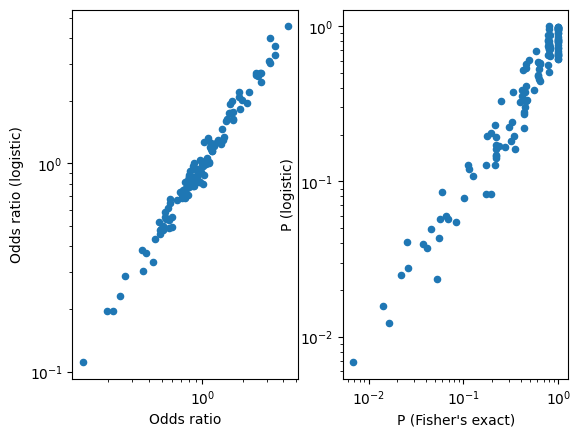

In [7]:
from roux.viz.figure import get_ax
_=df_.plot.scatter(
    x='Odds ratio',
    y='Odds ratio (logistic)',
    logx=True,
    logy=True,
    ax=get_ax('gca'),
)
_=df_.plot.scatter(
    x="P (Fisher's exact)",
    y='P (logistic)',
    logx=True,
    logy=True,
    ax=get_ax('gca'),
)

## Documentation
[`roux.stat.sets`](https://github.com/rraadd88/roux#module-rouxstatsets)